In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
survive_y = titanic_df[(titanic_df['Survived'] == 1)]
new_survive_y = survive_y.dropna()
new_survive_y.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


In [32]:
survive_n = titanic_df[(titanic_df['Survived'] == 0)]
new_survive_n = survive_n.dropna()
new_survive_n.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S


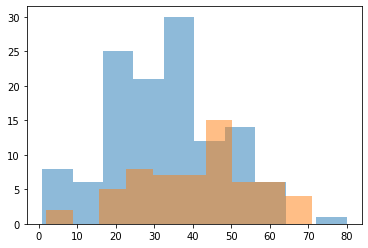

In [33]:
plt.hist(new_survive_y['Age'], alpha = 0.5)
plt.hist(new_survive_n['Age'], alpha = 0.5)
plt.show()

In [36]:
print(stats.describe(new_survive_y['Age']))
print(stats.describe(new_survive_n['Age']))

DescribeResult(nobs=123, minmax=(0.92, 80.0), mean=32.905853658536586, variance=221.71546053578567, skewness=0.11036517600265433, kurtosis=0.031225201077919262)
DescribeResult(nobs=60, minmax=(2.0, 71.0), mean=41.35, variance=247.73135593220334, skewness=-0.30756108127889464, kurtosis=-0.2764299013556979)


In [54]:
t, p = stats.ttest_ind(new_survive_y['Age'], new_survive_n['Age'])
if p < 0.05:
    print('reject null')
else:
    print('do not reject null')

reject null


In [53]:
signal = new_survive_y["Age"].mean() - new_survive_n["Age"].mean()
noise = math.sqrt((new_survive_y['Age'].var()/len(new_survive_y['Age'])) + (new_survive_n['Age'].var()/len(new_survive_n['Age'])))
t = signal/noise
ci_low = signal - 1.96 * noise
ci_up = signal + 1.96 * noise
print(ci_low, ci_up)

-13.217629930703906 -3.670662752222926
